>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# 통계적 추정과 에러바
Statistical estimation and error bars

데이터를 시각화하다 보면 여러 데이터 포인트를 압축(reudce)해서 요약통계정보(summary static; 평균, 중앙값 등)으로 나타내는 과정이 필요하기도 합니다.
이런 요약통계를 사용할 때는 그 요약이 데이터 포인트들을 얼마나 잘 나타내는지에 대한 시각적 단서인 error bar를 추가해주는 것이 좋습니다.  
<br>
seaborn의 function은 전체 데이터셋이 주어지면 이런 요약통계와 error bar를 자동으로 계산해주기도 합니다. 
이번 챕터에서는 error bar로 보여줄 정보를 어떻게 선택하는지, 어떤 옵션을 선택해야 하는지에 대해 알아보겠습니다.  
<br>
중심경향 추정치 주변의 error bar는 두 가지 정보 ('불확실성의 범위'와 '추정치 주변 데이터의 확산') 중 하나를 나타낼 수 있습니다. 
이 둘은 서로 연관되어 있습니다 : 
동일한 표본 크기에서 데이터의 확산(spread)가 커지면 추정치의 불확실성도 커집니다. 반면, 표본 크기가 커지면 불확실성은 감소하지만 확산은 그렇지 않습니다.  
<br>
seaborn에서는 위의 두 error bar의 종류별 만드는 방법이 있습니다.  
* parameteric(모수식) : 분포의 모양에 대한 가정에 의존하는 공식을 사용하는 방식  
* nonparametric(비모수식) : 사용자가 제공한 데이터만 사용하는 방식

<br>  

플롯팅 과정에 추정(estimation)이 포함된 function에는 `errorbar` parameter가 있습니다. 
사용자는 이 parameter에 사용할 method의 이름과 interval size 매개변수를 넣어서 제어할 수 있습니다. 
사용자의 선택지는 error bar가 표현되는 방법과 구성방법에 따라 아래와 같이 2D 분류 체계로 정의할 수 있습니다 : 
<br>  
[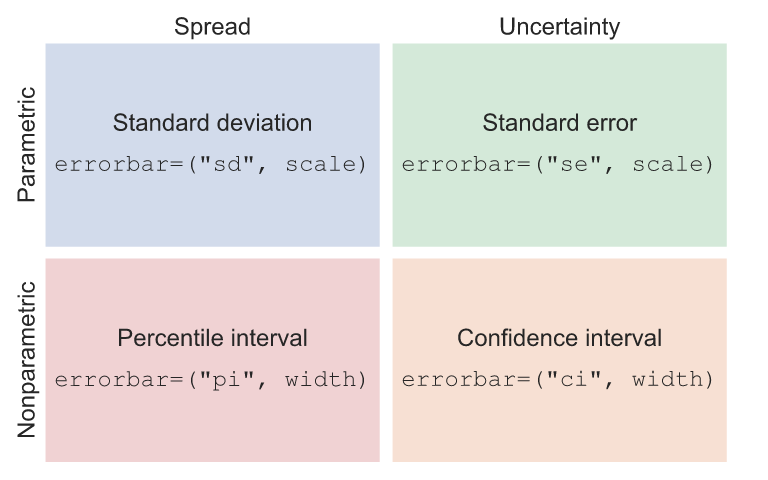](https://seaborn.pydata.org/_images/error_bars_2_0.svg)
<br>  
위의 표를 보면 parametric일 때와 nonparametric일 때 size parameter가 다르게 정의되어 있습니다. 
parametric error bar의 경우, size는 오차를 정의하는 통계(표준오차 또는 표준편차)를 곱한 스칼라 계수입니다. 
nonparametric error bar의 경우, 백분위수 너비입니다. 
각각의 자세한 내용은 아래에서 살펴보겠습니다.
<br>
>여기에 설명된 error bar API는 seaborn v0.12에 도입되었습니다. 이전 버전에서는 부트스트랩 신뢰 구간 또는 표준 편차를 표시하는 옵션만 있었으며, 선택은 `ci` parameter(즉, `ci=<size>` 또는 `ci="sd"`)로 제어할 수 있었습니다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

서로 다른 매개변수화(parameterization)을 비교하기 위해서, 다음의 helper function을 사용하겠습니다 : 

In [4]:
def plot_errorbars(arg, **kws) :
    np.random.seed(sum(map(ord, 'error_bars')))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout='tight')
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

## 데이터의 확산 측정
Measures of data spread

데이터 분포를 나타내는 error bar는 분포를 3가지 정보(숫자)를 이용해서 요약해줍니다. (`boxplot()`은 5개 이상의 숫자를 사용하고, `violinplot()`은 복잡한 알고리즘을 사용해서 보여줍니다.)

### 표준 편차 오차 막대
Standard deviation error bars

<br>

표준편차(standard deviation) error bar는 가장 단순하게 보여주기 좋은 방법입니다. 
우리에게 가장 익숙한 방법인 표준편차는 각 데이터포인트에서 샘플평균까지의 거리의 평균값입니다. 
default로는 `errorbar="sd"`이 추정치에서 (-1 x sd) ~ (+1 x sd) 의 범위에 error bar를 그리게 되고, scaliing size parameter를 이용해서 범위를 조정할 수도 있습니다. 
정규분포라는 가정하에, 데이터의 약 68%가 (1 x sd) 범위 내에, 약 95%의 데이터가 (2 x sd) 범위 내에, 약 97% 데이터가 (3 x sd) 범위 내에 위치하게 됩니다.

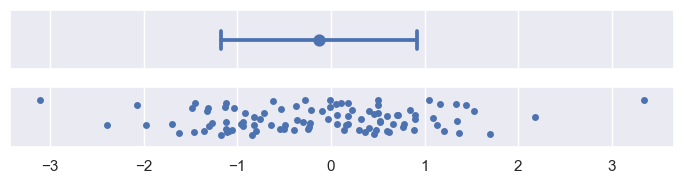

In [5]:
plot_errorbars('sd')

### 백분위수 구간 error bar
Percentile interval error bars

<br>

백분위수 구간(percentile intervals)도 데이터가 속하는 범위를 표시하지만, 샘플 데이터에서 직접 백분위수를 구한다는 점에서는 다릅니다. 
`errorbar="pi"`는  default로 데이터의 95%가 속하는 2.5% ~ 97.5% 구간을 표시합니다. 
사용자는 size parmeter를 이용해서 사분위수 범위 같이 특정 범위를 나타낼 수도 있습니다 :

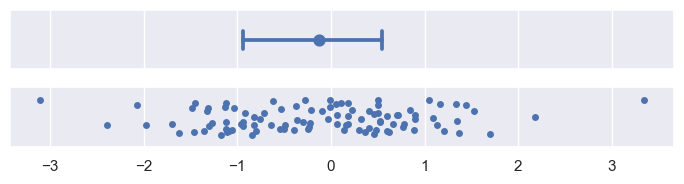

In [6]:
plot_errorbars(("pi", 50))

표준편차 error bar는 항상 추정치를 중심으로 대칭을 이루게 됩니다. 
이런 특성 때문에 데이터가 왜곡된 경우(skewed), 특히 데이터의 특성상 한계가 있을 수 밖에 없는 경우 (ex. 데이터가 양수 값만 가질 수 있을 때) 문제가 될 수 있습니다. 
그래서 경우에 따라서는 error bar가 "불가능한"값까지 확장되어 보여지기도 합니다.
단, 비모수적(nonparametric) 방식은 비대칭 확산이 가능하고 데이터 범위를 절대 넘어가지 않기 때문에 이런 문제가 발생하지 않습니다.

## 데이터의 불확실성 측정
Measures of data uncertainty

## 회귀에서 error bar
Error bars on regression fits

## error bar로 충분할까?
Are error bars enough?